In [3]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

In [4]:
# Upload the datasets
print("Upload the impacts dataset:")
uploaded_impacts = files.upload()
impacts_df = pd.read_csv('impacts.csv')

Upload the impacts dataset:


Saving impacts.csv to impacts.csv


In [5]:
print("Upload the orbits dataset:")
uploaded_orbits = files.upload()
orbits_df = pd.read_csv('orbits.csv')

Upload the orbits dataset:


Saving orbits.csv to orbits.csv


In [6]:
# Display the first few rows of both datasets
print("Impacts Dataset:")
print(impacts_df.head())

Impacts Dataset:
  Object Name  Period Start  Period End  Possible Impacts  \
0    2006 WP1          2017        2017                 1   
1     2013 YB          2017        2046                23   
2     2008 US          2017        2062                30   
3  2010 VR139          2017        2076                24   
4  2015 ME131          2017        2096                85   

   Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude  \
0                   5.200000e-09              17.77                28.3   
1                   7.600000e-05               8.98                31.4   
2                   1.600000e-05              18.33                31.4   
3                   2.000000e-07               4.99                26.7   
4                   2.300000e-08              19.46                19.2   

   Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale  \
0                   0.007                     -8.31                  -8.31   
1        

In [7]:
print("Orbits Dataset:")
print(orbits_df.head())

Orbits Dataset:
    Object Name Object Classification  Epoch (TDB)  Orbit Axis (AU)  \
0      433 Eros         Amor Asteroid        57800           1.4579   
1    719 Albert         Amor Asteroid        57800           2.6385   
2    887 Alinda         Amor Asteroid        57800           2.4787   
3  1036 Ganymed         Amor Asteroid        57800           2.6628   
4     1221 Amor         Amor Asteroid        57800           1.9191   

   Orbit Eccentricity  Orbit Inclination (deg)  Perihelion Argument (deg)  \
0              0.2226                  10.8277                   178.8050   
1              0.5479                  11.5822                   156.1409   
2              0.5671                   9.3561                   350.3482   
3              0.5338                  26.6929                   132.4690   
4              0.4356                  11.8795                    26.6572   

   Node Longitude (deg)  Mean Anomoly (deg)  Perihelion Distance (AU)  \
0              304.32

In [8]:
# Clean the Object Name columns in both datasets
impacts_df['Object Name'] = impacts_df['Object Name'].str.strip().str.lower()
orbits_df['Object Name'] = orbits_df['Object Name'].str.strip().str.lower()

In [9]:
# Merging datasets on 'Object Name' while keeping all rows from both datasets
merged_df = pd.merge(impacts_df, orbits_df, on='Object Name', how='outer')

In [10]:
# Display the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())


Merged Dataset:
  Object Name  Period Start  Period End  Possible Impacts  \
0   (1979 xb)           NaN         NaN               NaN   
1   (1982 ya)           NaN         NaN               NaN   
2   (1983 lc)           NaN         NaN               NaN   
3   (1986 na)           NaN         NaN               NaN   
4   (1988 ne)           NaN         NaN               NaN   

   Cumulative Impact Probability  Asteroid Velocity  Asteroid Magnitude_x  \
0                            NaN                NaN                   NaN   
1                            NaN                NaN                   NaN   
2                            NaN                NaN                   NaN   
3                            NaN                NaN                   NaN   
4                            NaN                NaN                   NaN   

   Asteroid Diameter (km)  Cumulative Palermo Scale  Maximum Palermo Scale  \
0                     NaN                       NaN                    NaN 

In [11]:
# Check for missing values in the merged dataset
print("\nMissing Values in Merged Dataset:")
print(merged_df.isnull().sum())


Missing Values in Merged Dataset:
Object Name                                     0
Period Start                                15635
Period End                                  15635
Possible Impacts                            15635
Cumulative Impact Probability               15635
Asteroid Velocity                           15635
Asteroid Magnitude_x                        15635
Asteroid Diameter (km)                      15635
Cumulative Palermo Scale                    15635
Maximum Palermo Scale                       15635
Maximum Torino Scale                        15635
Object Classification                         683
Epoch (TDB)                                   683
Orbit Axis (AU)                               683
Orbit Eccentricity                            683
Orbit Inclination (deg)                       683
Perihelion Argument (deg)                     683
Node Longitude (deg)                          683
Mean Anomoly (deg)                            683
Perihelion Dist

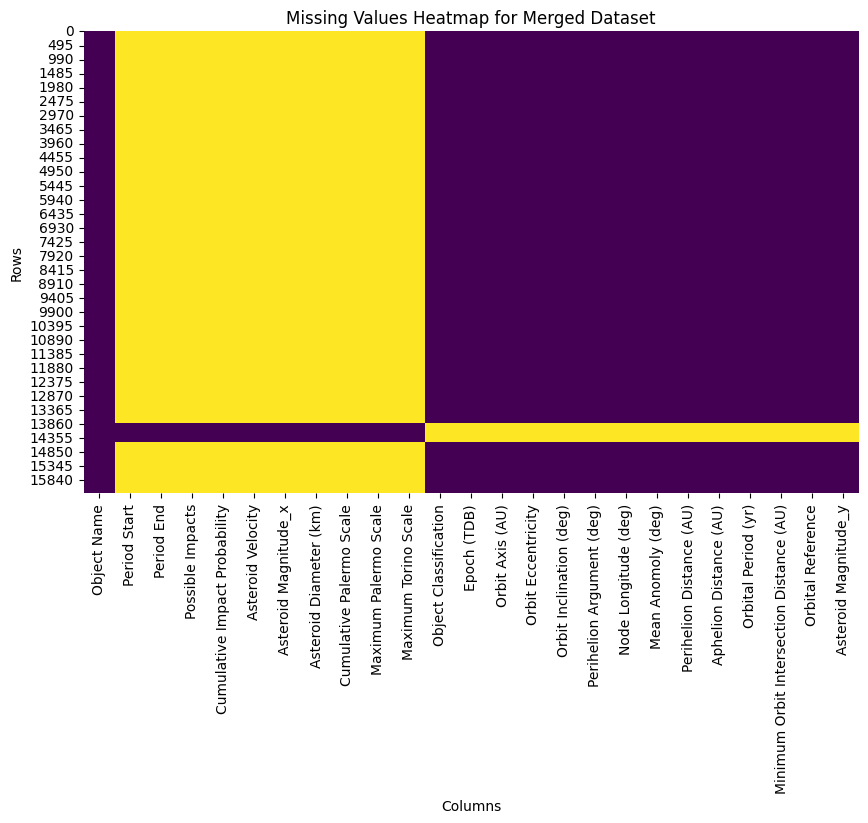

In [12]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Merged Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [13]:
# Fill missing values with the mean for numerical columns
for column in merged_df.select_dtypes(include=[np.number]).columns:
    merged_df[column].fillna(merged_df[column].mean(), inplace=True)

<ipython-input-13-43be4bf50625>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(merged_df[column].mean(), inplace=True)


In [14]:
# Drop rows with missing values for non-numerical columns
merged_df.dropna(subset=['Object Name'], inplace=True)

In [15]:
# Verify if missing values are handled
print("\nMissing Values After Handling:")
print(merged_df.isnull().sum())


Missing Values After Handling:
Object Name                                     0
Period Start                                    0
Period End                                      0
Possible Impacts                                0
Cumulative Impact Probability                   0
Asteroid Velocity                               0
Asteroid Magnitude_x                            0
Asteroid Diameter (km)                          0
Cumulative Palermo Scale                        0
Maximum Palermo Scale                           0
Maximum Torino Scale                        15635
Object Classification                         683
Epoch (TDB)                                     0
Orbit Axis (AU)                                 0
Orbit Eccentricity                              0
Orbit Inclination (deg)                         0
Perihelion Argument (deg)                       0
Node Longitude (deg)                            0
Mean Anomoly (deg)                              0
Perihelion Distanc

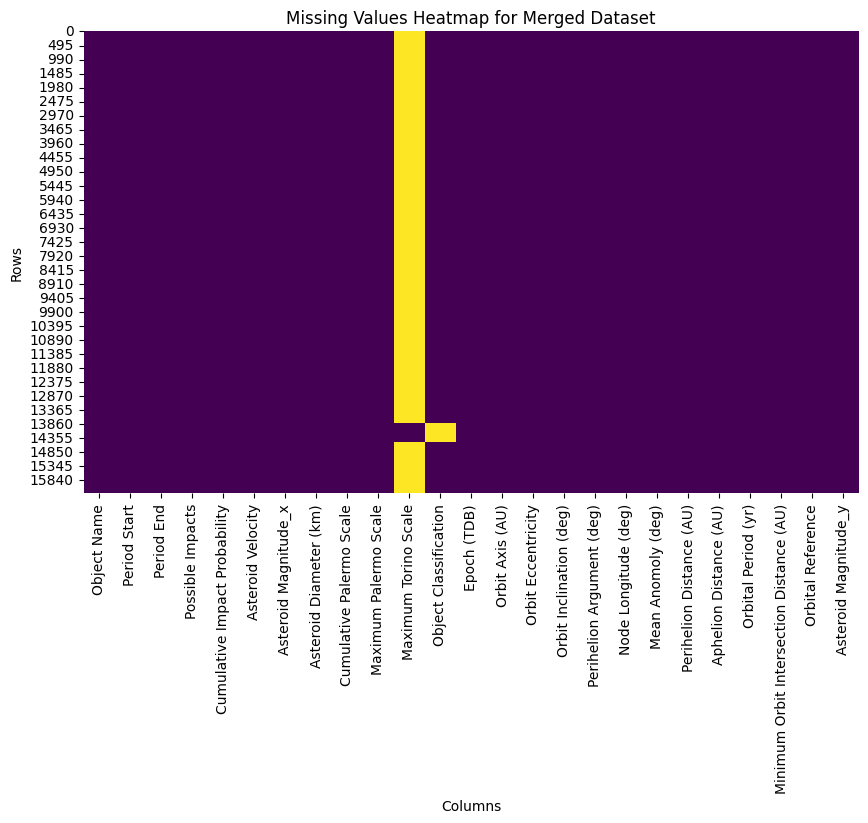

In [16]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for Merged Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [17]:
# Perform EDA

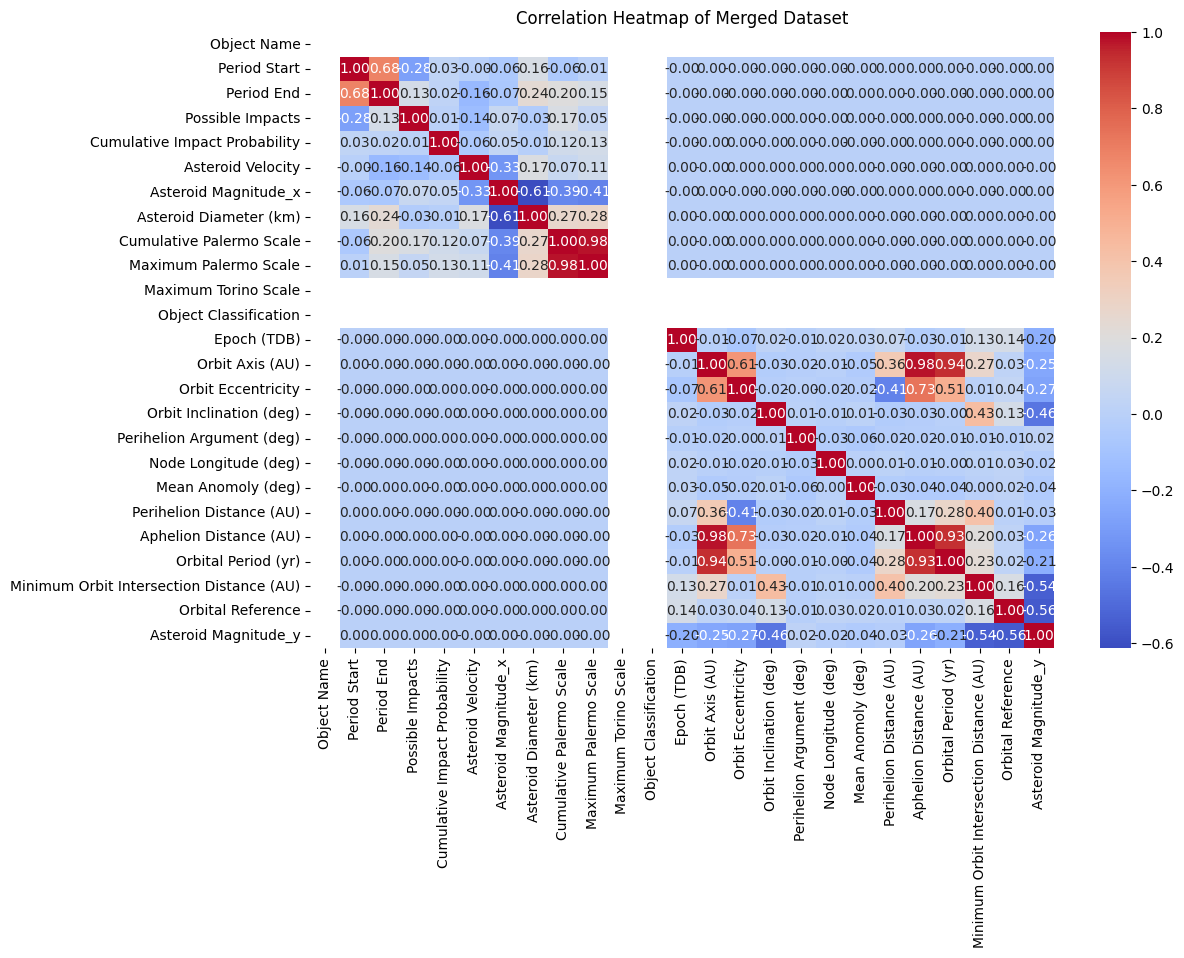

In [18]:
# Convert columns with potential string values to numeric, handling errors
for col in merged_df.columns:
    try:
        # Attempt to convert the column to numeric
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    except (ValueError, TypeError):
        # Handle cases where conversion fails (e.g., non-numeric strings)
        print(f"Column '{col}' could not be converted to numeric. Skipping...")

# Visualization 1: Correlation heatmap for numerical features in merged dataset
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Merged Dataset')
plt.show()

In [19]:
# Visualization 2: Distribution of Asteroid Magnitude from merged dataset
plt.figure(figsize=(10, 6))
# Check if the column exists (case-sensitive) and if not, print available columns
if 'Asteroid Magnitude' not in merged_df.columns:
    print(f"Error: 'Asteroid Magnitude' column not found. Available columns: {merged_df.columns}")
else:
    sns.histplot(merged_df['Asteroid Magnitude'], bins=30, color='orange', kde=True)
    plt.title('Distribution of Asteroid Magnitudes')
    plt.xlabel('Asteroid Magnitude')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

Error: 'Asteroid Magnitude' column not found. Available columns: Index(['Object Name', 'Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude_x', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale', 'Object Classification', 'Epoch (TDB)',
       'Orbit Axis (AU)', 'Orbit Eccentricity', 'Orbit Inclination (deg)',
       'Perihelion Argument (deg)', 'Node Longitude (deg)',
       'Mean Anomoly (deg)', 'Perihelion Distance (AU)',
       'Aphelion Distance (AU)', 'Orbital Period (yr)',
       'Minimum Orbit Intersection Distance (AU)', 'Orbital Reference',
       'Asteroid Magnitude_y'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

In [20]:
# Select features for Linear Regression
features = ['Asteroid Velocity', 'Asteroid Diameter (km)', 'Asteroid Magnitude', 'Orbit Axis (AU)', 'Orbit Eccentricity']
target = 'Cumulative Impact Probability'  # or another target variable based on your interest

In [21]:
# Prepare data for regression
# Get the actual column names from the DataFrame
available_features = list(merged_df.columns)

# Check if the desired features are in the DataFrame
for feature in features:
    if feature not in available_features:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Available features: {available_features}")
        # You can either remove the feature from the list or handle it appropriately

# Select only the features that are available
selected_features = [feature for feature in features if feature in available_features]

# Proceed with data preparation using the selected features
X = merged_df[selected_features]
y = merged_df[target]

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"\nMean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.00
R^2 Score: 0.00


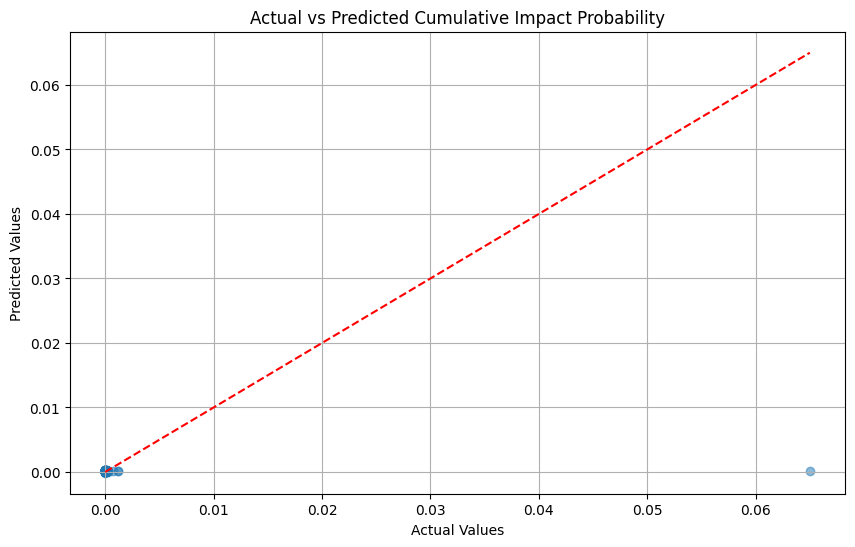

In [27]:
# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Cumulative Impact Probability')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

In [28]:
# Save the merged DataFrame to a CSV file
merged_file_name = 'merged_impacts_orbits.csv'
merged_df.to_csv(merged_file_name, index=False)

In [29]:
# Provide a download link for the merged file
files.download(merged_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>